# Day 4: Cleanup and Classification

## Data Munging

In [1]:
import pandas as pd
from matplotlib import style

style.use('fivethirtyeight')

In [2]:
titanic = pd.read_csv("data/titanic_data.csv")
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
titanic.PassengerId[:5]

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [4]:
titanic = titanic.drop(labels=["Cabin", "Ticket", "PassengerId"], axis=1)

In [5]:
titanic.columns
for col in titanic.columns:
    print(col, titanic[col].hasnans)

Survived False
Pclass False
Name False
Sex False
Age True
SibSp False
Parch False
Fare False
Embarked True


In [6]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Fill nans with the mean

In [7]:
sum(pd.isnull(titanic.Age))

177

In [8]:
titanic.Age = titanic.Age.fillna(titanic.Age.mean())

In [9]:
sum(pd.isnull(titanic.Age))

0

## Handling Catagorical Data

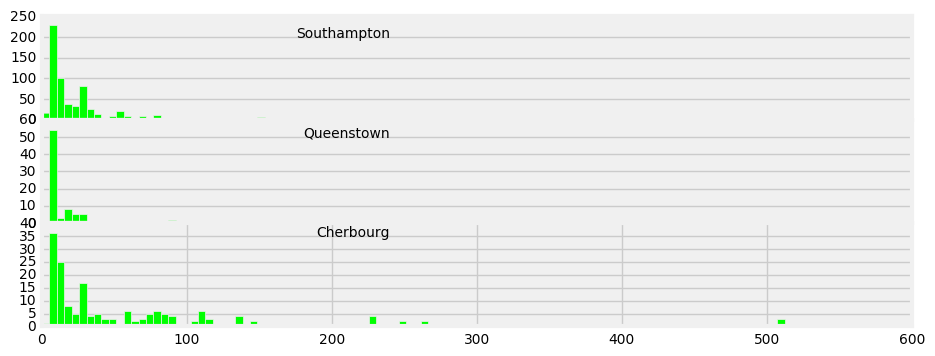

In [10]:
import matplotlib.pyplot as plt

import numpy as np

southampton = titanic.Embarked == "S"
queenstown = titanic.Embarked == "Q"
cherbourg = titanic.Embarked == "C"

bins = np.linspace(0, titanic.Fare.max(), 101)

fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(hspace=0)
plt.subplot(3, 1, 1)
plt.hist(titanic[southampton].Fare, bins=bins, color="#00ff00")
plt.text(240, 200, "Southampton", horizontalalignment="right")
plt.xticks([])

plt.subplot(3, 1, 2)
plt.hist(titanic[queenstown].Fare, bins=bins, color="#00ff00")
plt.text(240, 50, "Queenstown", horizontalalignment="right")
plt.xticks([])

plt.subplot(3, 1, 3)
plt.hist(titanic[cherbourg].Fare, bins=bins, color="#00ff00")
plt.text(240, 35, "Cherbourg", horizontalalignment="right")

plt.show()

In [11]:
print(sum(southampton))
print(sum(queenstown))
print(sum(cherbourg))

644
77
168


In [12]:
def fill_Embarked(x):
    """Take in a data row and fill the Embarked column with a data point
    if it is currently null.
    """
    if pd.isnull(x.Embarked):
        if x.Fare <= 20:
            return "Q"
        elif x.Fare > 50:
            return "C"
        else:
            return "S"
        
    else:
        return x.Embarked

In [13]:
titanic.Embarked = [fill_Embarked(titanic.loc[i]) for i in range(len(titanic))]

## Rescaling Data

In [14]:
def rescale(xval, xdata):
    """Rescale xval with respect to all of the xdata"""
    top = xval - min(xdata)
    bottom = max(xdata) - min(xdata)
    return top / bottom

In [15]:
titanic.Age[0]

22.0

In [16]:
rescale(titanic.Age[0], titanic.Age)

0.27117366172405127

In [17]:
titanic.Fare[0]

7.25

In [18]:
rescale(titanic.Fare[0], titanic.Fare)

0.014151057562208049

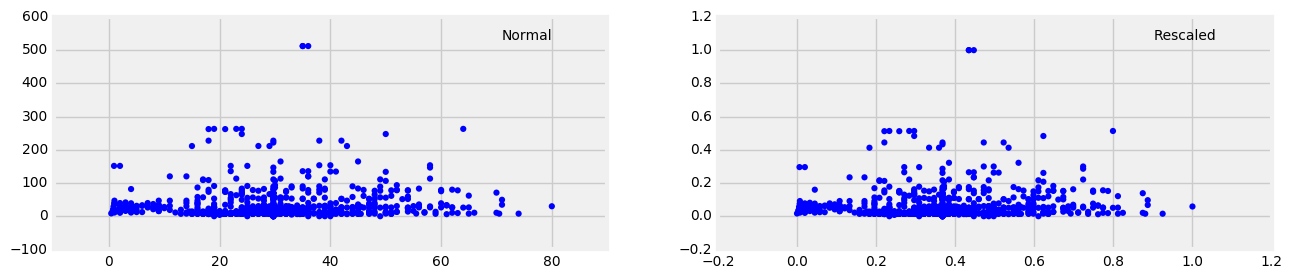

In [19]:
plt.figure(figsize=(14, 3))
ax = plt.subplot(1, 2, 1) # before
ax.scatter(titanic.Age, titanic.Fare, edgecolor="None")
ax.text(0.9, 0.9, "Normal",
         transform=ax.transAxes,
         horizontalalignment="right")

ax = plt.subplot(1, 2, 2) # after
ax.scatter(rescale(titanic.Age, titanic.Age),
    rescale(titanic.Fare, titanic.Fare),
    edgecolor="None")
ax.text(0.9, 0.9, "Rescaled",
 transform=ax.transAxes,
 horizontalalignment="right")

plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
scaler.fit_transform(titanic.Age.reshape(-1,1))

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


array([[ 0.27117366],
       [ 0.4722292 ],
       [ 0.32143755],
       [ 0.43453129],
       [ 0.43453129],
       [ 0.36792055],
       [ 0.67328474],
       [ 0.01985423],
       [ 0.33400352],
       [ 0.17064589],
       [ 0.04498618],
       [ 0.72354863],
       [ 0.24604172],
       [ 0.48479517],
       [ 0.17064589],
       [ 0.68585072],
       [ 0.01985423],
       [ 0.36792055],
       [ 0.3842674 ],
       [ 0.36792055],
       [ 0.43453129],
       [ 0.42196532],
       [ 0.18321186],
       [ 0.34656949],
       [ 0.09525006],
       [ 0.4722292 ],
       [ 0.36792055],
       [ 0.23347575],
       [ 0.36792055],
       [ 0.36792055],
       [ 0.49736115],
       [ 0.36792055],
       [ 0.36792055],
       [ 0.8240764 ],
       [ 0.34656949],
       [ 0.52249309],
       [ 0.36792055],
       [ 0.25860769],
       [ 0.22090978],
       [ 0.17064589],
       [ 0.49736115],
       [ 0.33400352],
       [ 0.36792055],
       [ 0.03242021],
       [ 0.23347575],
       [ 0

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
clf = KNeighborsClassifier()

### Training

In [24]:
clf.fit(titanic[["Age", "Fare"]], titanic.Survived)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Scale first

In [26]:
titanic["age_scaled"] = scaler.fit_transform(titanic.Age.values.reshape(-1, 1))
titanic["fare_scaled"] = scaler.fit_transform(titanic.Fare.values.reshape(-1, 1))

In [27]:
clf.fit(titanic[["age_scaled", "fare_scaled"]], titanic.Survived)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Valigating Out Classifier

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(titanic[["age_scaled", "fare_scaled"]], titanic.Survived, test_size=0.33)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(titanic[["age_scaled", "fare_scaled"]], titanic.Survived, test_size=0.33, random_state=4)

In [31]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:

y_model = clf.predict(X_test)

## Cross-Validation

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_model)

0.67796610169491522

In [35]:
from sklearn.model_selection import KFold

In [36]:
# kf = KFold(n_splits=5, random_state=4)
kf = KFold(n_splits=5, shuffle=True)

In [37]:
kf.get_n_splits(titanic)

5

In [38]:
for train_index, test_index in kf.split(titanic):
    X_train = titanic[["age_scaled", "fare_scaled"]].loc[train_index]
    X_test = titanic[["age_scaled", "fare_scaled"]].loc[test_index]

    y_train = titanic.Survived.loc[train_index]
    y_test = titanic.Survived.loc[test_index]

    clf.fit(X_train, y_train)
    y_model = clf.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_model))

accuracy:  0.631284916201
accuracy:  0.707865168539
accuracy:  0.634831460674
accuracy:  0.634831460674
accuracy:  0.651685393258


In [39]:
avg_accuracy = []

for k in range(1, 40):
    clf = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    kf = KFold(n_splits=5, random_state=4, shuffle=True)
    kf.get_n_splits(titanic)

    for train_index, test_index in kf.split(titanic):
        X_train = titanic[["age_scaled", "fare_scaled"]].loc[train_index]
        X_test = titanic[["age_scaled", "fare_scaled"]].loc[test_index]

        y_train = titanic.Survived.loc[train_index]
        y_test = titanic.Survived.loc[test_index]

        clf.fit(X_train, y_train)
        y_model = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_model))

    avg_accuracy.append(np.mean(accuracies))

print("Optimal Neighbors: {} with {}% accuracy".format(np.argmax(avg_accuracy) + 1, np.round(max(avg_accuracy), 4) * 100))

Optimal Neighbors: 23 with 68.67999999999999% accuracy


In [40]:
len(avg_accuracy)

39

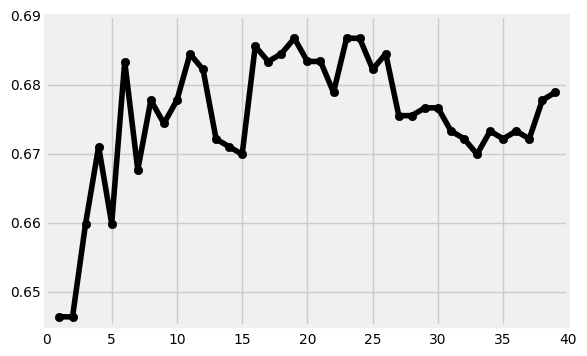

In [41]:
plt.plot(range(1, 40), avg_accuracy, 'ko-')
plt.show()

## K-Mean Classifier

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


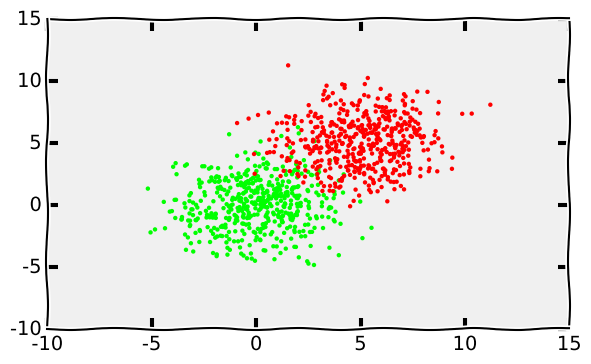

In [46]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 500
x1, y1 = np.random.normal(0, 2, (2, num_points))
x2, y2 = np.random.normal(5, 2, (2, num_points))

plt.xkcd()
plt.scatter(x1, y1, edgecolor="None", s=10, c="#00FF00")
plt.scatter(x2, y2, edgecolor="None", s=10, c="#FF0000")
plt.show()

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


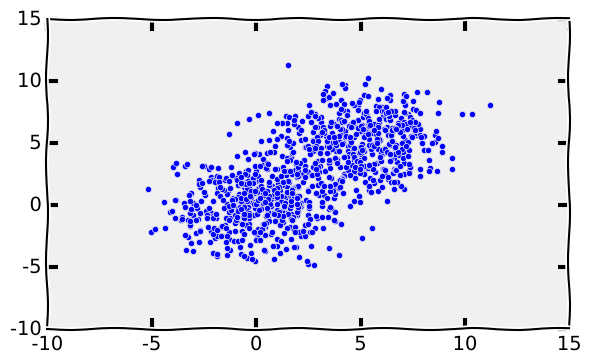

In [48]:
Xdata = np.concatenate([x1, x2])
Ydata = np.concatenate([y1, y2])
plt.scatter(Xdata, Ydata)
plt.show()

In [52]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
clf.fit(list(zip(Xdata, Ydata)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
clusters_x = clf.cluster_centers_.T[0]
clusters_y = clf.cluster_centers_.T[1]
clf.cluster_centers_.T

array([[ 0.05900903,  5.05852396],
       [ 0.06968604,  5.22070568]])

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


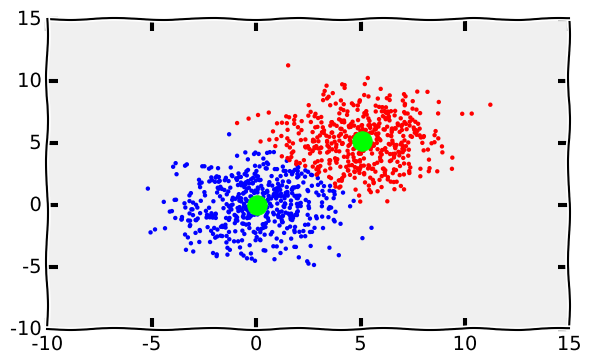

In [74]:
# plt.scatter(Xdata, Ydata, edgecolor="None", s=10, color='black')


labels = clf.predict(list(zip(Xdata, Ydata)))

plt.scatter(Xdata[labels == 0],
            Ydata[labels == 0],
            edgecolor="None", s=10, c="blue")
plt.scatter(Xdata[labels == 1],
            Ydata[labels == 1],
            edgecolor="None", s=10, c="#FF0000")
plt.scatter(clusters_x, clusters_y, color='#00ff00', s=200)
plt.show()